In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'



/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


0.6004891328123441 0.611245676309075 +- 0.0004318993255078286
0.5986112995936422 0.6105966883122921 +- 0.00036868516585519123


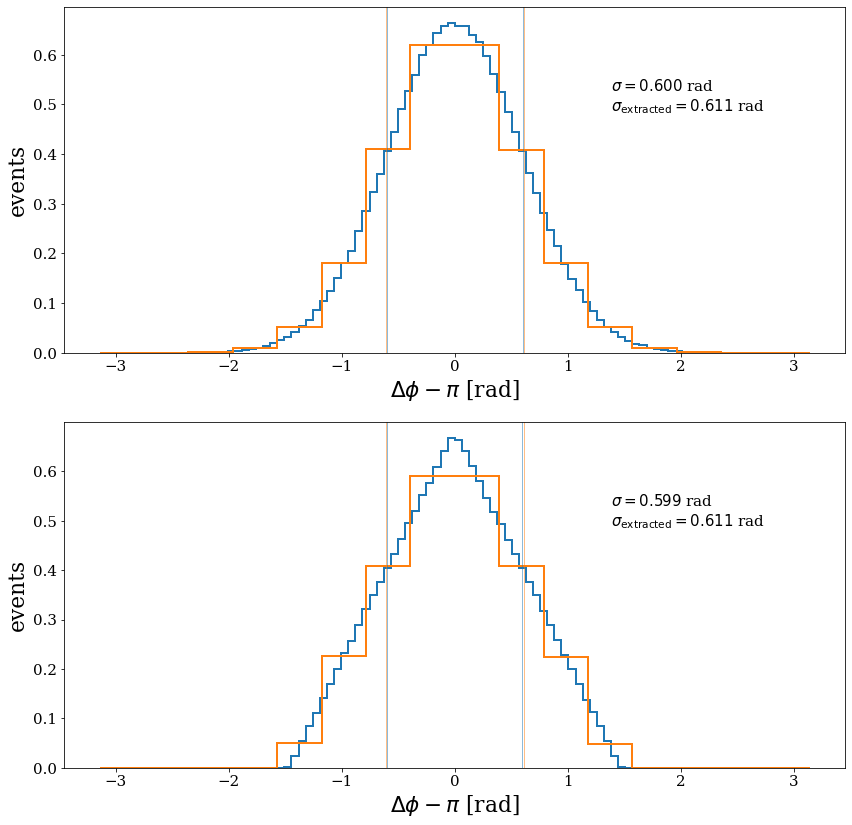

In [63]:
sigma_inj = 0.6
labels='gaussian triangle'.split()
nbins = 8
fig, axs = plt.subplots(2,1, figsize=(14,14))
for j in range(2):
    vals=[]
    for i in range(1000000):
        if j == 0:
            val = r.gauss(0,sigma_inj)
        elif j == 1:
            val = r.triangular(-3*6/7.37*sigma_inj, 3*6/7.37*sigma_inj)
        while val<-np.pi:
            val += 2*np.pi
        while val>np.pi:
            val -= 2*np.pi
        vals.append(val)
    plt.sca(axs[j])
    plt.hist(vals, bins=np.linspace(-np.pi, np.pi, 101), label="distribution", histtype='step', density=True, linewidth=2)
    y, x, _ = plt.hist(vals, bins=np.linspace(-np.pi, np.pi, 2*nbins+1), label="wide bins", histtype='step', density=True, linewidth=2)
    dx = x[1]-x[0]
    dy = np.sqrt(y/(dx*len(vals)))
    x = (x[1:]+x[:-1])/2
    sigma_actual = np.std(vals)
    sum_y = np.sum(y)
    sigma_extract = np.sqrt(sum(y*x**2)/sum_y)
    dsigma_extract=np.sqrt(sum(dy**2*((x**2-sigma_extract**2)/sum_y)**2))/(2*sigma_extract)
    print(sigma_actual, sigma_extract, "+-", dsigma_extract)
    
    plt.axvline(sigma_actual, color='tab:blue', linewidth =.5)
    plt.axvline(-sigma_actual, color='tab:blue', linewidth =.5)
    plt.axvline(sigma_extract, color='tab:orange', linewidth =.5)
    plt.axvline(-sigma_extract, color='tab:orange', linewidth =.5)
    
    plt.text(.7, .7, f"$\\sigma={sigma_actual:.3f}$ rad\n$\\sigma_{{\\rm extracted}}={sigma_extract:.3f}$ rad",
            transform=axs[j].transAxes)
    plt.xlabel("$\Delta\phi-\pi$ [rad]")
    plt.ylabel("events")
plt.show()

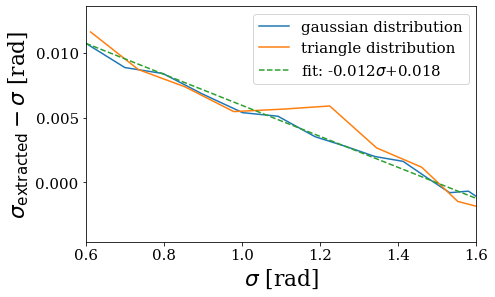

In [70]:
#check some systematics:
import random
r = random.Random()

nbins=8
labels='gaussian triangle'.split()
xx = {}
yy = {}
for j in 0, 1:
    xx[j] = []
    yy[j] = []
    for sigma_inj in np.linspace(.5, 2, 16):
        

        vals = []
        for i in range(100000):
            if j == 0:
                val = r.gauss(0,sigma_inj)
            elif j == 1:
                val = r.triangular(-3*sigma_inj, 3*sigma_inj)
            else :
                val = r.uniform(-2*sigma_inj, 2*sigma_inj)
            while val<-np.pi:
                val += 2*np.pi
            while val>np.pi:
                val -= 2*np.pi
            vals.append(val)
        sigma_actual = np.std(vals)
        y, x = np.histogram(np.abs(vals), bins=np.linspace(0, np.pi, nbins+1))

        x= (x[:-1]+ x[1:])/2
        sigma_extract = np.sqrt(sum(y*x**2)/sum(y))
        xx[j].append(sigma_actual)
        yy[j].append(sigma_extract)
    plt.plot(xx[j], np.subtract(yy[j],xx[j]), linestyle='-', label =labels[j] + ' distribution')
#plt.plot((0,1.8), (0,1.8), linestyle='--' )

plt.xlabel("$\sigma$ [rad]")
plt.ylabel("$\\sigma_{\\rm extracted}-\\sigma$ [rad]")
plt.xlim(0.6, 1.6)

y=pd.Series(yy[0])-pd.Series(xx[0])
x=pd.Series(xx[0])
m= (np.sum(x*y)*len(x)-np.sum(x)*np.sum(y))/(np.sum(x*x)*len(x)-np.sum(x)**2)
b= np.mean(y-m*x)

plt.plot([0.6, 1.6], [0.6*m+b, 1.6*m+b], linestyle='--', label= f"fit: {m:.3f}$\sigma$+{b:.3f}")
plt.legend()


In [ ]:
plt.plot(xx[0]-x)

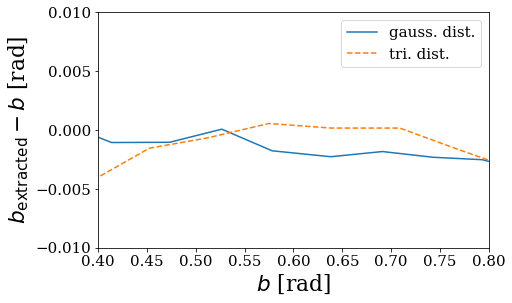

In [32]:
fig=plt.Figure(figsize=(8,8))

#check some systematics:
import random
r = random.Random()

nbins=8
labels='gauss. tri.'.split()
xx = {}
yy = {}
for j in 0, 1:
    for sigma1_inj in (1.0,):
        
        vals = []
        for i in range(100000):
            if j == 0:
                val = r.gauss(0,sigma1_inj)
            elif j == 1:
                val = r.triangular(-2.6*sigma1_inj, 2.6*sigma1_inj)
            else :
                val = r.uniform(-2*sigma1_inj, 2*sigma1_inj)
            while val<-np.pi:
                val += 2*np.pi
            while val>np.pi:
                val -= 2*np.pi
            vals.append(val)
        sigma1_actual = np.std(vals)
        y, x = np.histogram(np.abs(vals), bins=np.linspace(0, np.pi, nbins+1))

        x= (x[:-1]+ x[1:])/2
        sigma1_extract = np.sqrt(sum(y*x**2)/sum(y))
        
        
        xx[j] = []
        yy[j] = []
        for b_inj in np.linspace(.3, 1.2, 16):
            sigma2_inj=np.hypot(sigma1_inj,b_inj)
            vals = []
            for i in range(100000):
                if j == 0:
                    val = r.gauss(0,sigma2_inj)
                elif j == 1:
                    val = r.triangular(-2.6*sigma2_inj, 2.6*sigma2_inj)
                else :
                    val = r.uniform(-2*sigma2_inj, 2*sigma2_inj)
                while val<-np.pi:
                    val += 2*np.pi
                while val>np.pi:
                    val -= 2*np.pi
                vals.append(val)
            sigma2_actual = np.std(vals)
            y, x = np.histogram(np.abs(vals), bins=np.linspace(0, np.pi, nbins+1))

            x= (x[:-1]+ x[1:])/2
            sigma2_extract = np.sqrt(sum(y*x**2)/sum(y))
            
            b_actual=np.sqrt(abs(sigma2_actual**2-sigma1_actual**2))
            b_extract=np.sqrt(abs(sigma2_extract**2-sigma1_extract**2))
            
            xx[j].append(b_actual)
            yy[j].append(b_extract)
        plt.plot(xx[j], np.subtract(yy[j],xx[j]), linestyle='-' if j == 0 else '--', 
                 label =labels[j] + f' dist.')
#plt.plot((0,1.8), (0,1.8), linestyle='--' )

plt.xlabel("$b$ [rad]")
plt.ylabel("$b_{\\rm extracted}-b$ [rad]")
plt.xlim(0.4, 0.8)
plt.ylim(-.01, .01)

y=pd.Series(yy[0])-pd.Series(xx[0])
x=pd.Series(xx[0])
m= (np.sum(x*y)*len(x)-np.sum(x)*np.sum(y))/(np.sum(x*x)*len(x)-np.sum(x)**2)
b= np.mean(y-m*x)

#plt.plot([0.6, 1.6], [0.6*m+b, 1.6*m+b], linestyle='--', label= f"fit: {m:.3f}$\sigma$+{b:.3f}")
plt.legend()

